In [20]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load data

In [6]:
folder_path = "C:/Users/heung/OneDrive/Documents/scData/14. GSE136001_RAW/"
adata = sc.read(folder_path + "adata_scVI.h5ad")
adata

AnnData object with n_obs × n_vars = 37255 × 16739
    obs: 'sample', 'sex', 'condition', 'n_genes', 'total_counts', 'pct_counts_mito', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'neighbors', 'pca', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    varm: 'PCs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

# Clustering

In [7]:
sc.pp.pca(adata)
sc.tl.leiden(adata, resolution=1.0)

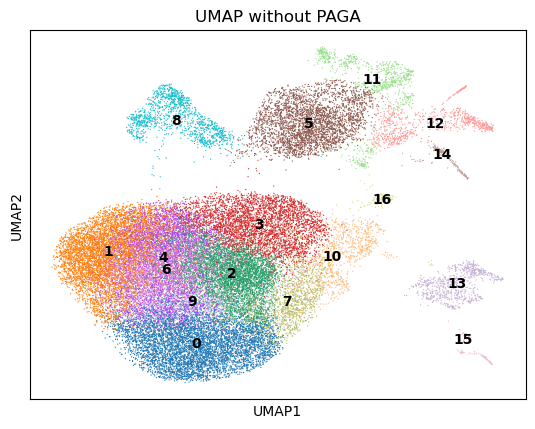

In [8]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')
sc.tl.umap(adata)

sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', title = 'UMAP without PAGA')

In [11]:
# PAGA 계산
sc.tl.paga(adata, groups='leiden')


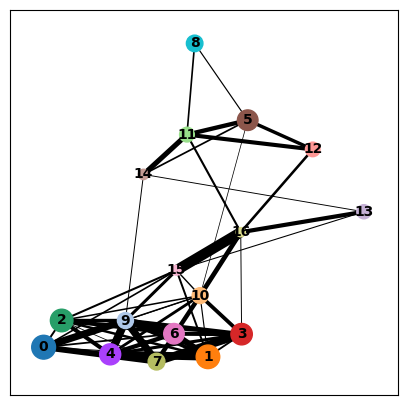

In [35]:
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.paga(adata, color = 'leiden', ax = ax, threshold = 0.06)

In [16]:
# UMAP 계산
sc.pp.neighbors(adata, use_rep='X_scVI')
sc.tl.umap(adata, init_pos='paga')



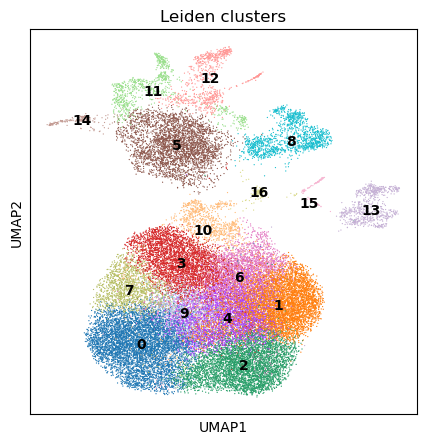

In [24]:
# UMAP 그리기
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.umap(adata, color = ['leiden'], legend_loc = 'on data', title = ['Leiden clusters'], ax = ax)